## Fadenpendel (klassisch)

Fadenpendel mit Rückstellkraft, Reibung und Anregung

\begin{equation}
m l \ddot{\theta} = - m g \sin(\theta) - \lambda l \dot{\theta} + f(t)
\end{equation}
\begin{equation}
\Leftrightarrow \ddot{\theta} = - \frac{g}{l} \sin(\theta) - \frac{\lambda}{m} \dot{\theta} + f(t)
\end{equation}

### DGL-System 1.ter Ordnung

\begin{align}
\dot{x}_2 &= - \frac{g}{l} \sin(x_1) - \frac{\lambda}{m} x_2 + f(t)\\
\dot{x}_1 &= x_2
\end{align}

## harmonischer Oszillator

Oszillator mit Rückstellkraft, Reibung und Anregung

\begin{equation}
m\ddot{x} = - k x - \lambda \dot{x} + f(t)
\end{equation}
\begin{equation}
\Leftrightarrow \ddot{x} = - \frac{k}{m} x - \frac{\lambda}{m} \dot{x} + f(t)
\end{equation}

### DGL-System 1.ter Ordnung

\begin{align}
\dot{x}_2 &= - \frac{k}{m} x_1 - \frac{\lambda}{m} x_2 + f(t)\\
\dot{x}_1 &= x_2
\end{align}

### Anfangsbedingungen
$x_1^{(0)}=3$, $x_2^{(0)}=0$<br>
$k=50$<br>
$m=1$<br>
$\lambda=0 \quad / \quad 0.2$<br>
$f(t)=0 \quad / \quad 1*np.cos(w_0*t) \quad / \quad 50*np.cos(1*t)$


### vorwärts Eulermethode
Mit der Eulermethode wird der Wert einer Funktion $f(x)$ an der Stelle $x_0 + h$ ausgehend von dem Wert and der Stelle $x_0$ mit einem Schritt $h$ entlang der Ableitung dieser Funktion berechnet. Dies entspricht einer linearen Fortsetzung der Funktion durch ihre Ableitung.
<br>
Eine mögliche Herleitung ist es eine Funktion f(x) an der Stelle $x_0$ mit einer Taylorreihe zu entwickeln, um den Wert an Stelle $x_0 + h$ anzunähern.<br>
Alle Terme ab dem quadratischen Term werden ignoriert.
<br>
\begin{equation}
f(x_0 + h) \approx f(x_0) + f'(x_0) \cdot h + \frac{1}{2} f''(x_0) \cdot h^2 + ...
\end{equation}

------------------------

Alternativ können die Ableitung $f'(x)$ im Intervall $x_0$ bis $x_0 + h$ integriert werden.
<br>
\begin{equation}
\int_{x_0}^{x_0 + h} f'(x) dx = f(x_0 + h) - f(x_0)
\end{equation}

Nähert man die Ableitung $f'(x)$ auf dem Abschnitt als näherungsweise konstant an, so kann das Integral vereinfacht werden.
<br>
\begin{equation}
f'(x_0) \cdot h \approx f(x_0 + h) - f(x_0)
\end{equation}

Daraus ergibt sich wieder die Gleichung für die Eulermethode
<br>
\begin{equation}
f(x_0 + h) \approx f(x_0) + f'(x_0) \cdot h
\end{equation}

----------------------
### Rückwärts Eulermethode
Bei der rückwärts Eulermethode wird für die Fortsetzung der Funktion statt der Ableitung bei $x_0$ die Ableitung bei $x_0+h$ verwendet.
<br>
\begin{equation}
f(x_0 + h) \approx f(x_0) + f'(x_0 + h) \cdot h\\
\qquad \approx f(x_0) + f'(x_0 + h,f(x_0 + h)) \cdot h\\
\end{equation}

Die Ableitung $f'(x_0 + h)$ ist im Voraus nicht bekannt. In einem DGL-System 1.ter Ordnung hängt sie vom Funktionswert $f(x_0 + h)$ ab und der Funktionswert umgekehrt auch von der Ableitung. Somit muss für jeden Schritt ein Gleichungssystem gelöst werden.
<br>
Alternativ kann die Lösung iterativ angenähert werden. Dazu berechnet man zuerst die Ableitung $f'(x)$ vom Startwert $x_0$. Daraus bekommt man einen Näherungwert $f^{\lbrack 0 \rbrack}(x_0 + h)$ mit der vorwärts Eulermethode.Im nächsten Schritt wird dieser neue Wert zur Berechnung der Ableitung verwendet, woraus wieder eine bessere Näherung $f^{\lbrack 1 \rbrack}(x_0 + h)$ resultiert. Diese Iteration wird so lange wiederholt, bis die Näherung gut genug ist.
<br>
\begin{equation}
f^{\lbrack 0 \rbrack}(x_0 + h) = f(x_0)\\
f^{\lbrack k+1 \rbrack}(x_0 + h) \approx f(x_0) + f'(x_0 + h,f^{\lbrack k \rbrack}(x_0 + h)) \cdot h
\end{equation}

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Kreisfrequenz =  7.0710678118654755 
 Periodendauer =  0.8885765876316732


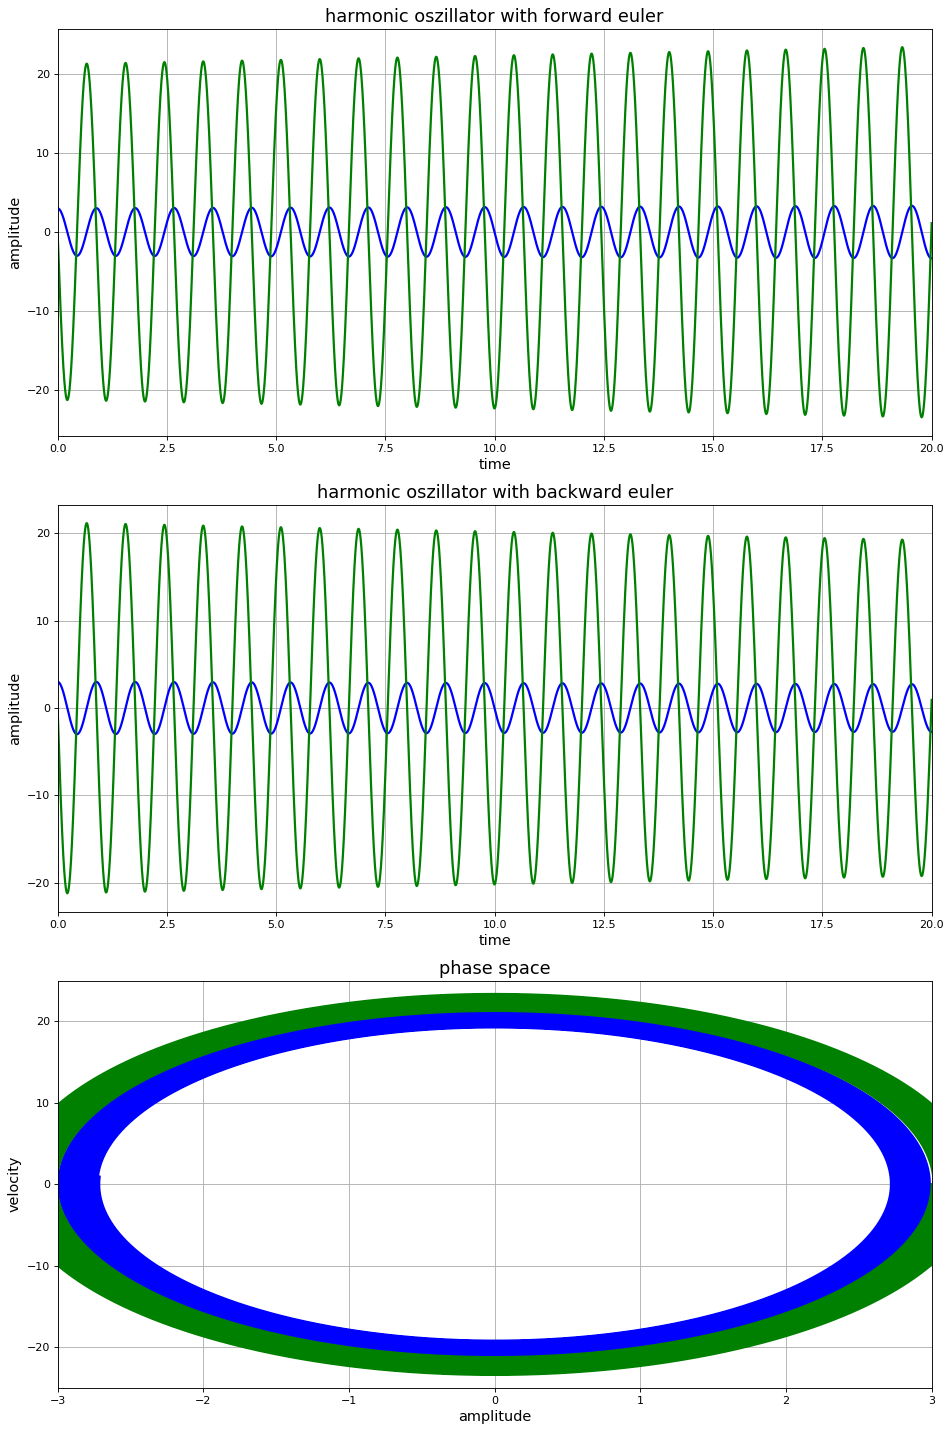

In [24]:
#harmonic oscillator without friction
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

global i,pi
i = np.complex(0,1)
pi = np.pi

##########calculate##########

#iterations
N=100000
#start time
a=0
#end time
b=20
#time step
h=(b-a)/N
#time array (for plotting)
t_array=np.arange(a,b,h)

#constants
k=50
m=1
lambd=0#0.2

w0=np.sqrt(k/m)#=2pi*f
f=w0/(2*pi)
T=1/f
print('Kreisfrequenz = ',w0,'\n','Periodendauer = ',T)

#disturbance
f = lambda t: 0
#f = lambda t: 1*np.cos(w0*t)
#f = lambda t: 50*np.cos(1*t)

#differential equations
dxdt2 = lambda x1,x2,f : - k/m*x1 - lambd/m*x2 + f
dxdt1 = lambda x1,x2,f : x2


ix1 = np.arange(0,N,1,dtype=float)
ix2 = np.arange(0,N,1,dtype=float)
ix1[0]=3
ix2[0]=0

#forward euler
for ii in range(0,N-1):
    t=h*ii
    ix1[ii+1]=ix1[ii]+h*dxdt1(ix1[ii],ix2[ii],f(t))
    ix2[ii+1]=ix2[ii]+h*dxdt2(ix1[ii],ix2[ii],f(t))


ex1 = np.arange(0,N,1,dtype=float)
ex2 = np.arange(0,N,1,dtype=float)
ex1[0]=3
ex2[0]=0


#backward euler
treshold = 1e-4
for ii in range(0,N-1):
    t=h*ii
    #forward euler step
    ex1[ii+1]=ex1[ii]+h*dxdt1(ex1[ii],ex2[ii],f(t))
    ex2[ii+1]=ex2[ii]+h*dxdt2(ex1[ii],ex2[ii],f(t))
    #iterate for backward euler step
    ex1_old = np.inf;ex2_old = np.inf;
    while( (np.abs(ex1_old-ex1[ii+1])>treshold) and (np.abs(ex2_old-ex2[ii+1])>treshold) ):
        ex1_old = ex1[ii+1]
        ex2_old = ex2[ii+1]
        ex1[ii+1]=ex1[ii]+h*dxdt1(ex1[ii+1],ex2[ii+1],f(t))
        ex2[ii+1]=ex2[ii]+h*dxdt2(ex1[ii+1],ex2[ii+1],f(t))

##########plot##########

fig = plt.figure(num=None, figsize=(12,18), dpi=80, facecolor='w', edgecolor='k')

ax1=plt.subplot(311)
ax1.plot(t_array,ix1,color="blue",label="amplitude", linewidth=2)
ax1.plot(t_array,ix2,color="green",label="velocity", linewidth=2)
ax1.set_title('harmonic oszillator with forward euler', fontsize=16)
ax1.set_xlabel('time', fontsize=13)
ax1.set_ylabel('amplitude', fontsize=13)
ax1.grid(True)
ax1.set_xlim(0,20)

ax2=plt.subplot(312)
ax2.plot(t_array,ex1,color="blue",label="amplitude", linewidth=2)
ax2.plot(t_array,ex2,color="green",label="velocity", linewidth=2)
ax2.set_title('harmonic oszillator with backward euler', fontsize=16)
ax2.set_xlabel('time', fontsize=13)
ax2.set_ylabel('amplitude', fontsize=13)
ax2.grid(True)
ax2.set_xlim(0,20)

ax3=plt.subplot(313)
ax3.plot(ex1,ex2,color="blue",label="trajectory explicite euler", linewidth=2)
ax3.plot(ix1,ix2,color="green",label="trajectory implicite euler", linewidth=2)
ax3.set_title('phase space', fontsize=16)
ax3.set_xlabel('amplitude', fontsize=13)
ax3.set_ylabel('velocity', fontsize=13)
ax3.grid(True)
ax3.set_xlim(-3,3)
ax3.set_ylim(-25,25)

#fig.gca().set_autoscale_on(False)
plt.tight_layout() #rescale subplots
plt.show()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Kreisfrequenz =  7.0710678118654755 
 Periodendauer =  0.8885765876316732


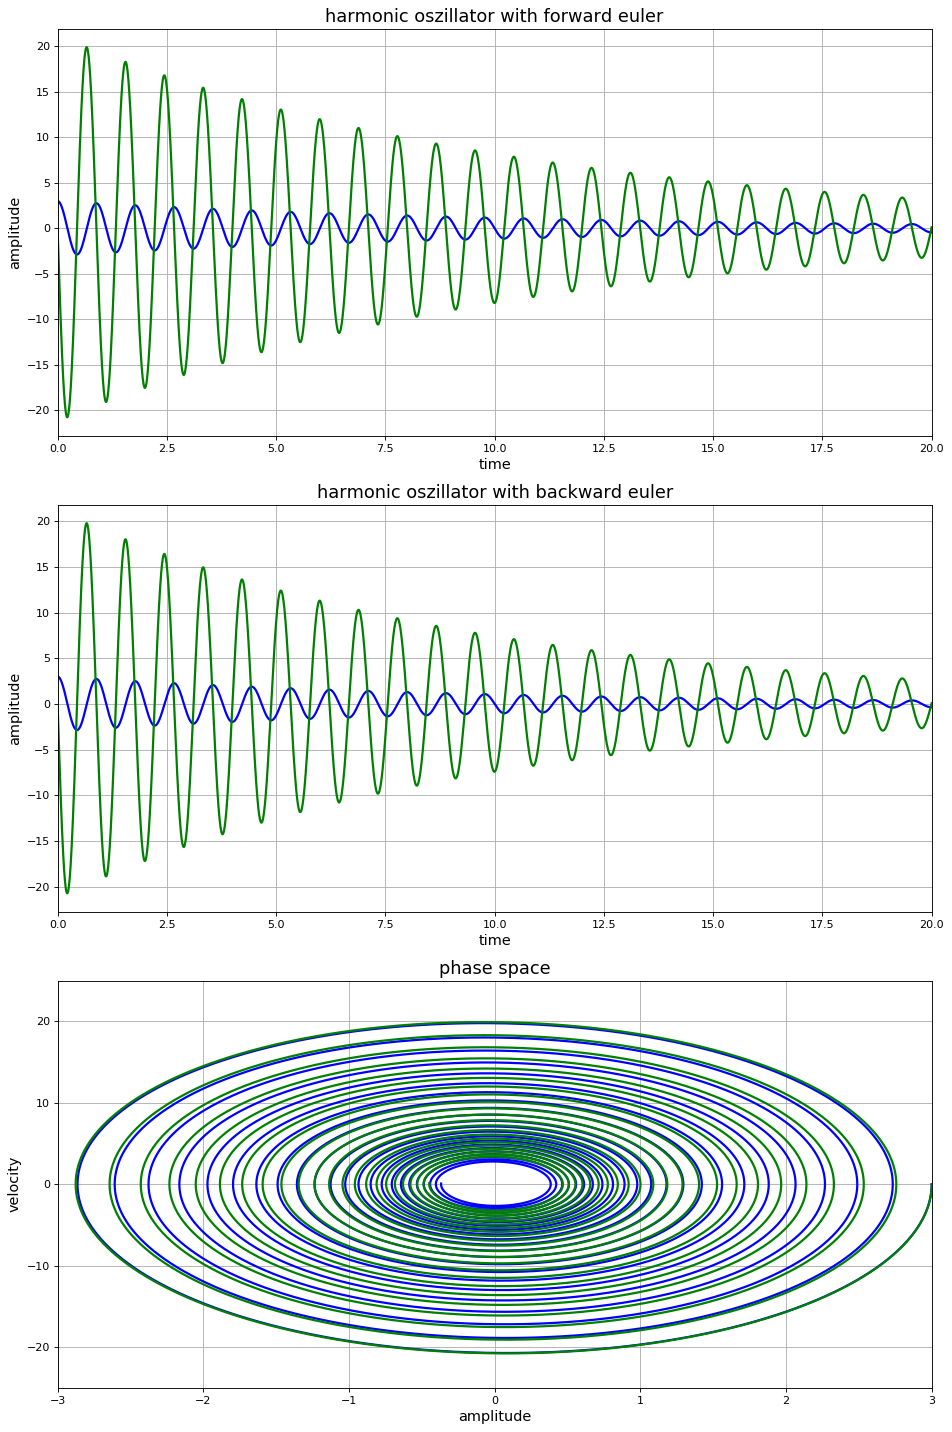

In [25]:
#harmonic oscillator with friction
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

global i,pi
i = np.complex(0,1)
pi = np.pi

##########calculate##########

#iterations
N=100000
#start time
a=0
#end time
b=20
#time step
h=(b-a)/N
#time array (for plotting)
t_array=np.arange(a,b,h)

#constants
k=50
m=1
lambd=0.2

w0=np.sqrt(k/m)#=2pi*f
f=w0/(2*pi)
T=1/f
print('Kreisfrequenz = ',w0,'\n','Periodendauer = ',T)

#disturbance
f = lambda t: 0
#f = lambda t: 1*np.cos(w0*t)
#f = lambda t: 50*np.cos(1*t)

#differential equations
dxdt2 = lambda x1,x2,f : - k/m*x1 - lambd/m*x2 + f
dxdt1 = lambda x1,x2,f : x2


ix1 = np.arange(0,N,1,dtype=float)
ix2 = np.arange(0,N,1,dtype=float)
ix1[0]=3
ix2[0]=0

#forward euler
for ii in range(0,N-1):
    t=h*ii
    ix1[ii+1]=ix1[ii]+h*dxdt1(ix1[ii],ix2[ii],f(t))
    ix2[ii+1]=ix2[ii]+h*dxdt2(ix1[ii],ix2[ii],f(t))


ex1 = np.arange(0,N,1,dtype=float)
ex2 = np.arange(0,N,1,dtype=float)
ex1[0]=3
ex2[0]=0


#backward euler
treshold = 1e-4
for ii in range(0,N-1):
    t=h*ii
    #forward euler step
    ex1[ii+1]=ex1[ii]+h*dxdt1(ex1[ii],ex2[ii],f(t))
    ex2[ii+1]=ex2[ii]+h*dxdt2(ex1[ii],ex2[ii],f(t))
    #iterate for backward euler step
    ex1_old = np.inf;ex2_old = np.inf;
    while( (np.abs(ex1_old-ex1[ii+1])>treshold) and (np.abs(ex2_old-ex2[ii+1])>treshold) ):
        ex1_old = ex1[ii+1]
        ex2_old = ex2[ii+1]
        ex1[ii+1]=ex1[ii]+h*dxdt1(ex1[ii+1],ex2[ii+1],f(t))
        ex2[ii+1]=ex2[ii]+h*dxdt2(ex1[ii+1],ex2[ii+1],f(t))

##########plot##########

fig = plt.figure(num=None, figsize=(12,18), dpi=80, facecolor='w', edgecolor='k')

ax1=plt.subplot(311)
ax1.plot(t_array,ix1,color="blue",label="amplitude", linewidth=2)
ax1.plot(t_array,ix2,color="green",label="velocity", linewidth=2)
ax1.set_title('harmonic oszillator with forward euler', fontsize=16)
ax1.set_xlabel('time', fontsize=13)
ax1.set_ylabel('amplitude', fontsize=13)
ax1.grid(True)
ax1.set_xlim(0,20)

ax2=plt.subplot(312)
ax2.plot(t_array,ex1,color="blue",label="amplitude", linewidth=2)
ax2.plot(t_array,ex2,color="green",label="velocity", linewidth=2)
ax2.set_title('harmonic oszillator with backward euler', fontsize=16)
ax2.set_xlabel('time', fontsize=13)
ax2.set_ylabel('amplitude', fontsize=13)
ax2.grid(True)
ax2.set_xlim(0,20)

ax3=plt.subplot(313)
ax3.plot(ex1,ex2,color="blue",label="trajectory explicite euler", linewidth=2)
ax3.plot(ix1,ix2,color="green",label="trajectory implicite euler", linewidth=2)
ax3.set_title('phase space', fontsize=16)
ax3.set_xlabel('amplitude', fontsize=13)
ax3.set_ylabel('velocity', fontsize=13)
ax3.grid(True)
ax3.set_xlim(-3,3)
ax3.set_ylim(-25,25)

#fig.gca().set_autoscale_on(False)
plt.tight_layout() #rescale subplots
plt.show()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Kreisfrequenz =  7.0710678118654755 
 Periodendauer =  0.8885765876316732


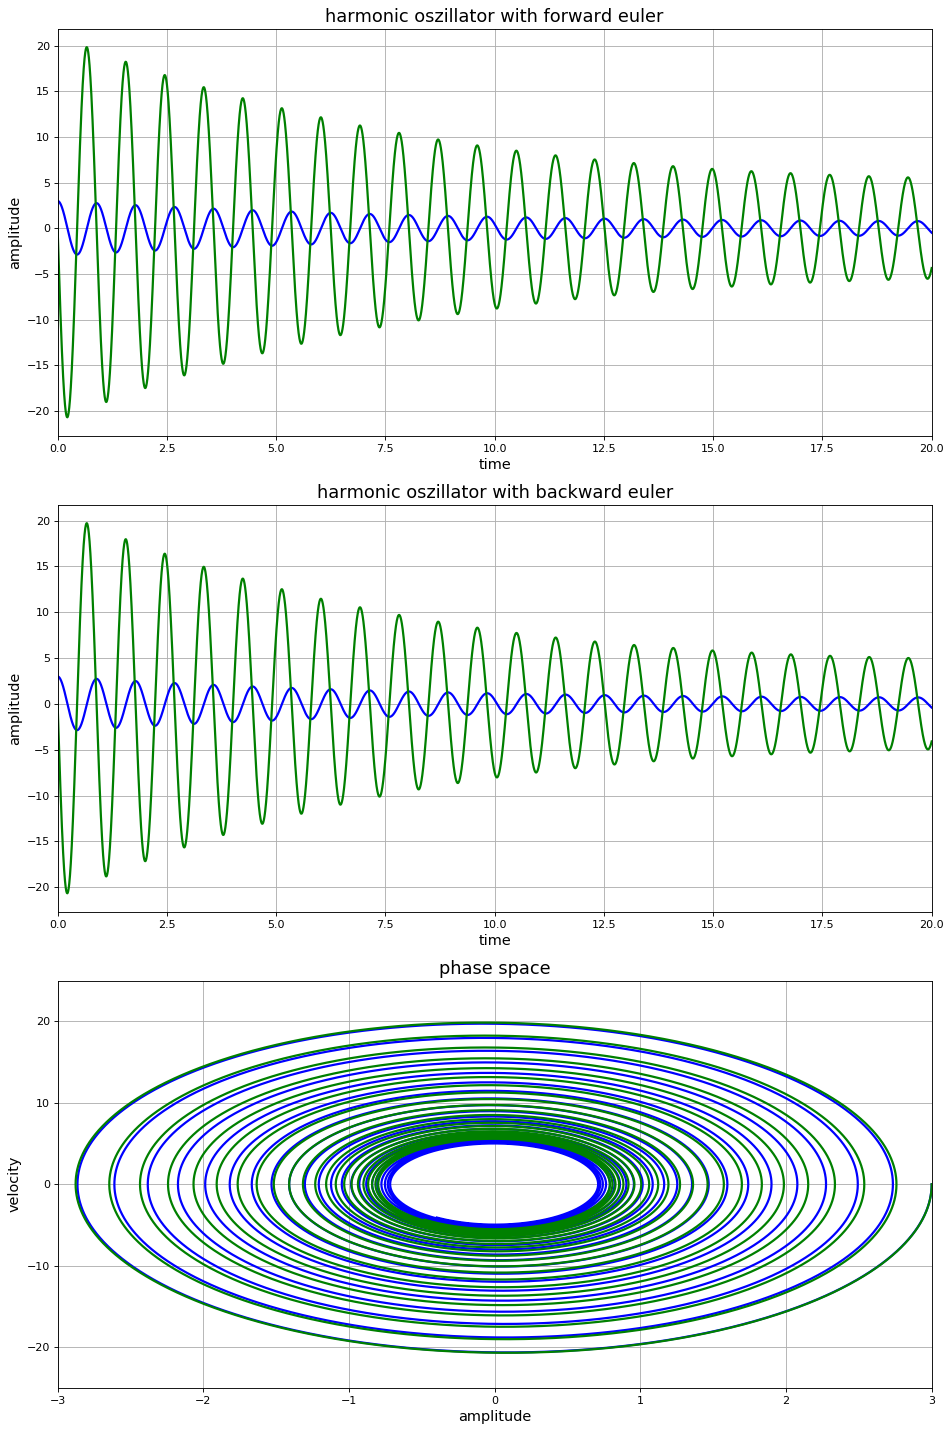

In [26]:
#harmonic oscillator with friction and driving force in phase
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

global i,pi
i = np.complex(0,1)
pi = np.pi

##########calculate##########

#iterations
N=100000
#start time
a=0
#end time
b=20
#time step
h=(b-a)/N
#time array (for plotting)
t_array=np.arange(a,b,h)

#constants
k=50
m=1
lambd=0.2

w0=np.sqrt(k/m)#=2pi*f
f=w0/(2*pi)
T=1/f
print('Kreisfrequenz = ',w0,'\n','Periodendauer = ',T)

#disturbance
#f = lambda t: 0
f = lambda t: 1*np.cos(w0*t)
#f = lambda t: 50*np.cos(1*t)

#differential equations
dxdt2 = lambda x1,x2,f : - k/m*x1 - lambd/m*x2 + f
dxdt1 = lambda x1,x2,f : x2


ix1 = np.arange(0,N,1,dtype=float)
ix2 = np.arange(0,N,1,dtype=float)
ix1[0]=3
ix2[0]=0

#forward euler
for ii in range(0,N-1):
    t=h*ii
    ix1[ii+1]=ix1[ii]+h*dxdt1(ix1[ii],ix2[ii],f(t))
    ix2[ii+1]=ix2[ii]+h*dxdt2(ix1[ii],ix2[ii],f(t))


ex1 = np.arange(0,N,1,dtype=float)
ex2 = np.arange(0,N,1,dtype=float)
ex1[0]=3
ex2[0]=0


#backward euler
treshold = 1e-4
for ii in range(0,N-1):
    t=h*ii
    #forward euler step
    ex1[ii+1]=ex1[ii]+h*dxdt1(ex1[ii],ex2[ii],f(t))
    ex2[ii+1]=ex2[ii]+h*dxdt2(ex1[ii],ex2[ii],f(t))
    #iterate for backward euler step
    ex1_old = np.inf;ex2_old = np.inf;
    while( (np.abs(ex1_old-ex1[ii+1])>treshold) and (np.abs(ex2_old-ex2[ii+1])>treshold) ):
        ex1_old = ex1[ii+1]
        ex2_old = ex2[ii+1]
        ex1[ii+1]=ex1[ii]+h*dxdt1(ex1[ii+1],ex2[ii+1],f(t))
        ex2[ii+1]=ex2[ii]+h*dxdt2(ex1[ii+1],ex2[ii+1],f(t))

##########plot##########

fig = plt.figure(num=None, figsize=(12,18), dpi=80, facecolor='w', edgecolor='k')

ax1=plt.subplot(311)
ax1.plot(t_array,ix1,color="blue",label="amplitude", linewidth=2)
ax1.plot(t_array,ix2,color="green",label="velocity", linewidth=2)
ax1.set_title('harmonic oszillator with forward euler', fontsize=16)
ax1.set_xlabel('time', fontsize=13)
ax1.set_ylabel('amplitude', fontsize=13)
ax1.grid(True)
ax1.set_xlim(0,20)

ax2=plt.subplot(312)
ax2.plot(t_array,ex1,color="blue",label="amplitude", linewidth=2)
ax2.plot(t_array,ex2,color="green",label="velocity", linewidth=2)
ax2.set_title('harmonic oszillator with backward euler', fontsize=16)
ax2.set_xlabel('time', fontsize=13)
ax2.set_ylabel('amplitude', fontsize=13)
ax2.grid(True)
ax2.set_xlim(0,20)

ax3=plt.subplot(313)
ax3.plot(ex1,ex2,color="blue",label="trajectory explicite euler", linewidth=2)
ax3.plot(ix1,ix2,color="green",label="trajectory implicite euler", linewidth=2)
ax3.set_title('phase space', fontsize=16)
ax3.set_xlabel('amplitude', fontsize=13)
ax3.set_ylabel('velocity', fontsize=13)
ax3.grid(True)
ax3.set_xlim(-3,3)
ax3.set_ylim(-25,25)

#fig.gca().set_autoscale_on(False)
plt.tight_layout() #rescale subplots
plt.show()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Kreisfrequenz =  7.0710678118654755 
 Periodendauer =  0.8885765876316732


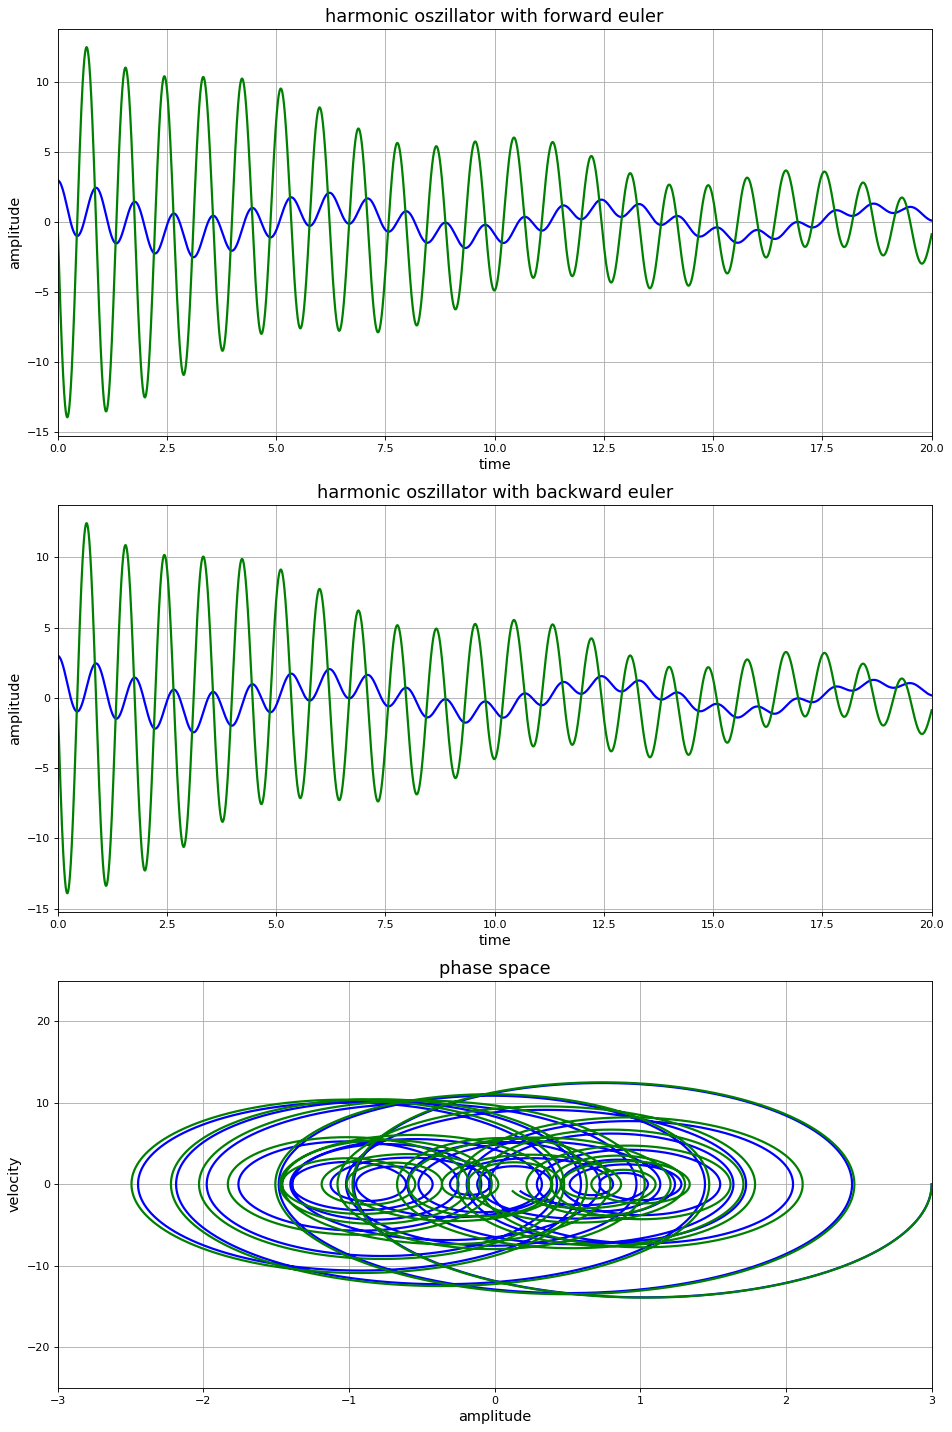

In [27]:
#harmonic oscillator with friction and driving force with different phase
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

global i,pi
i = np.complex(0,1)
pi = np.pi

##########calculate##########

#iterations
N=100000
#start time
a=0
#end time
b=20
#time step
h=(b-a)/N
#time array (for plotting)
t_array=np.arange(a,b,h)

#constants
k=50
m=1
lambd=0.2

w0=np.sqrt(k/m)#=2pi*f
f=w0/(2*pi)
T=1/f
print('Kreisfrequenz = ',w0,'\n','Periodendauer = ',T)

#disturbance
#f = lambda t: 0
#f = lambda t: 1*np.cos(w0*t)
f = lambda t: 50*np.cos(1*t)


#differential equations
dxdt2 = lambda x1,x2,f : - k/m*x1 - lambd/m*x2 + f
dxdt1 = lambda x1,x2,f : x2


ix1 = np.arange(0,N,1,dtype=float)
ix2 = np.arange(0,N,1,dtype=float)
ix1[0]=3
ix2[0]=0

#forward euler
for ii in range(0,N-1):
    t=h*ii
    ix1[ii+1]=ix1[ii]+h*dxdt1(ix1[ii],ix2[ii],f(t))
    ix2[ii+1]=ix2[ii]+h*dxdt2(ix1[ii],ix2[ii],f(t))


ex1 = np.arange(0,N,1,dtype=float)
ex2 = np.arange(0,N,1,dtype=float)
ex1[0]=3
ex2[0]=0


#backward euler
treshold = 1e-4
for ii in range(0,N-1):
    t=h*ii
    #forward euler step
    ex1[ii+1]=ex1[ii]+h*dxdt1(ex1[ii],ex2[ii],f(t))
    ex2[ii+1]=ex2[ii]+h*dxdt2(ex1[ii],ex2[ii],f(t))
    #iterate for backward euler step
    ex1_old = np.inf;ex2_old = np.inf;
    while( (np.abs(ex1_old-ex1[ii+1])>treshold) and (np.abs(ex2_old-ex2[ii+1])>treshold) ):
        ex1_old = ex1[ii+1]
        ex2_old = ex2[ii+1]
        ex1[ii+1]=ex1[ii]+h*dxdt1(ex1[ii+1],ex2[ii+1],f(t))
        ex2[ii+1]=ex2[ii]+h*dxdt2(ex1[ii+1],ex2[ii+1],f(t))

##########plot##########

fig = plt.figure(num=None, figsize=(12,18), dpi=80, facecolor='w', edgecolor='k')

ax1=plt.subplot(311)
ax1.plot(t_array,ix1,color="blue",label="amplitude", linewidth=2)
ax1.plot(t_array,ix2,color="green",label="velocity", linewidth=2)
ax1.set_title('harmonic oszillator with forward euler', fontsize=16)
ax1.set_xlabel('time', fontsize=13)
ax1.set_ylabel('amplitude', fontsize=13)
ax1.grid(True)
ax1.set_xlim(0,20)

ax2=plt.subplot(312)
ax2.plot(t_array,ex1,color="blue",label="amplitude", linewidth=2)
ax2.plot(t_array,ex2,color="green",label="velocity", linewidth=2)
ax2.set_title('harmonic oszillator with backward euler', fontsize=16)
ax2.set_xlabel('time', fontsize=13)
ax2.set_ylabel('amplitude', fontsize=13)
ax2.grid(True)
ax2.set_xlim(0,20)

ax3=plt.subplot(313)
ax3.plot(ex1,ex2,color="blue",label="trajectory explicite euler", linewidth=2)
ax3.plot(ix1,ix2,color="green",label="trajectory implicite euler", linewidth=2)
ax3.set_title('phase space', fontsize=16)
ax3.set_xlabel('amplitude', fontsize=13)
ax3.set_ylabel('velocity', fontsize=13)
ax3.grid(True)
ax3.set_xlim(-3,3)
ax3.set_ylim(-25,25)

#fig.gca().set_autoscale_on(False)
plt.tight_layout() #rescale subplots
plt.show()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Kreisfrequenz =  3.1622776601683795 
 Periodendauer =  1.9869176531592199


<Figure size 960x1440 with 0 Axes>

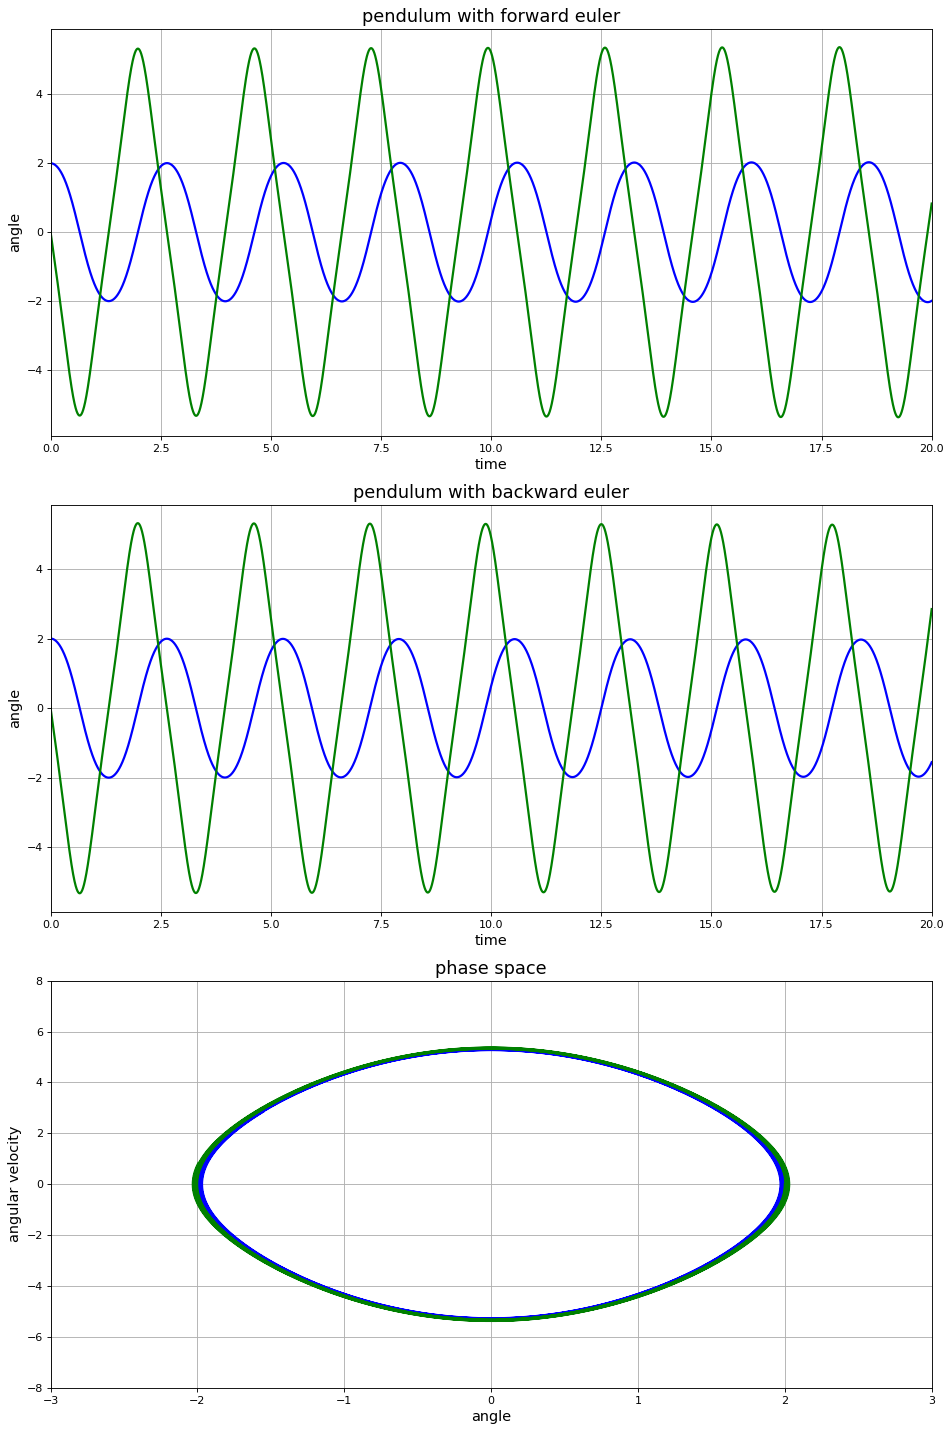

In [23]:
#pendulum without friction
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

global i,pi
i = np.complex(0,1)
pi = np.pi

##########calculate##########

#iterations
N=100000
#start time
a=0
#end time
b=20
#time step
h=(b-a)/N
#time array (for plotting)
t_array=np.arange(a,b,h)

#constants
g=10#9.81
m=1
l=1
lambd=0#0.2

w0=np.sqrt(g/l)#=2pi*f
f=w0/(2*pi)
T=1/f
print('Kreisfrequenz = ',w0,'\n','Periodendauer = ',T)

#disturbance
f = lambda t: 0
#f = lambda t: 1*np.cos(w0*t)
#f = lambda t: 50*np.cos(1*t)


#differential equations
dxdt2 = lambda x1,x2,f : - g/l*np.sin(x1) - lambd/m*x2 + f
dxdt1 = lambda x1,x2,f : x2


ix1 = np.arange(0,N,1,dtype=float)
ix2 = np.arange(0,N,1,dtype=float)
ix1[0]=2
ix2[0]=0

#forward euler
for ii in range(0,N-1):
    t=h*ii
    ix1[ii+1]=ix1[ii]+h*dxdt1(ix1[ii],ix2[ii],f(t))
    ix2[ii+1]=ix2[ii]+h*dxdt2(ix1[ii],ix2[ii],f(t))


ex1 = np.arange(0,N,1,dtype=float)
ex2 = np.arange(0,N,1,dtype=float)
ex1[0]=2
ex2[0]=0


#backward euler
treshold = 1e-4
for ii in range(0,N-1):
    t=h*ii
    #forward euler step
    ex1[ii+1]=ex1[ii]+h*dxdt1(ex1[ii],ex2[ii],f(t))
    ex2[ii+1]=ex2[ii]+h*dxdt2(ex1[ii],ex2[ii],f(t))
    #iterate for backward euler step
    ex1_old = np.inf;ex2_old = np.inf;
    while( (np.abs(ex1_old-ex1[ii+1])>treshold) and (np.abs(ex2_old-ex2[ii+1])>treshold) ):
        ex1_old = ex1[ii+1]
        ex2_old = ex2[ii+1]
        ex1[ii+1]=ex1[ii]+h*dxdt1(ex1[ii+1],ex2[ii+1],f(t))
        ex2[ii+1]=ex2[ii]+h*dxdt2(ex1[ii+1],ex2[ii+1],f(t))

##########plot##########

fig = plt.figure(num=None, figsize=(12,18), dpi=80, facecolor='w', edgecolor='k')


fig = plt.figure(num=None, figsize=(12,18), dpi=80, facecolor='w', edgecolor='k')

ax1=plt.subplot(311)
ax1.plot(t_array,ix1,color="blue",label="angle", linewidth=2)
ax1.plot(t_array,ix2,color="green",label="angular velocity", linewidth=2)
ax1.set_title('pendulum with forward euler', fontsize=16)
ax1.set_xlabel('time', fontsize=13)
ax1.set_ylabel('angle', fontsize=13)
ax1.grid(True)
ax1.set_xlim(0,20)

ax2=plt.subplot(312)
ax2.plot(t_array,ex1,color="blue",label="amplitude", linewidth=2)
ax2.plot(t_array,ex2,color="green",label="velocity", linewidth=2)
ax2.set_title('pendulum with backward euler', fontsize=16)
ax2.set_xlabel('time', fontsize=13)
ax2.set_ylabel('angle', fontsize=13)
ax2.grid(True)
ax2.set_xlim(0,20)

ax3=plt.subplot(313)
ax3.plot(ex1,ex2,color="blue",label="trajectory explicite euler", linewidth=2)
ax3.plot(ix1,ix2,color="green",label="trajectory implicite euler", linewidth=2)
ax3.set_title('phase space', fontsize=16)
ax3.set_xlabel('angle', fontsize=13)
ax3.set_ylabel('angular velocity', fontsize=13)
ax3.grid(True)
ax3.set_xlim(-3,3)
ax3.set_ylim(-8,8)

#fig.gca().set_autoscale_on(False)
plt.tight_layout() #rescale subplots
plt.show()